<a href="https://colab.research.google.com/github/immostafa/Analyzing-Visualizing-Data-PowerBI/blob/master/Data_Mining_Assignment-Mostafa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
!pip install openml # Uncomment to run in Google Colab
import openml as oml  
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
SVHN = oml.datasets.get_dataset(41081)

In [0]:
X, y, cats, attrs = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

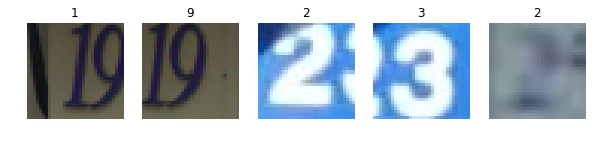

In [0]:
# Plots image. Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    if grayscale:
        [ax.imshow(X[n].reshape(32, 32)/255, cmap='gray')
         for n,ax in enumerate(axes)]
    else:
        [ax.imshow(X[n].reshape(32, 32, 3)/255) for n,ax in enumerate(axes)]
    [ax.set_title((y[n]+1)) for n,ax in enumerate(axes)]
    [ax.axis('off') for ax in axes]
plot_images(X[0:5], y[0:5]);

# **Evaluate different models (15 points)**

# **Lets make a stratified subsample which consists of 10% of the original data**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=42, stratify=y)

In [0]:
subsample_X = X_test
subsample_Y = y_test

# **Plot the distributions in a histogram using Plotly**

In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Histogram(x=subsample_Y)])
fig.update_layout(
    title_text='Subsample histogram', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2 # gap between bars of adjacent location coordinates
    # bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig


In [0]:
fig = go.Figure(data=[go.Histogram(x=y)])
fig.update_layout(
    title_text='Population histogram', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2 # gap between bars of adjacent location coordinates
    # bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig

# **SVM Linear with cross validation 3 fold**

In [0]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
svc = svm.SVC(kernel='linear')
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(subsample_X):
  print('Train: %s | test: %s' % (train_indices, test_indices))

[svc.fit(subsample_X[train], subsample_Y[train]).score(subsample_X[test], subsample_Y[test]) for train, test in k_fold.split(subsample_X)]

Train: [3310 3311 3312 ... 9926 9927 9928] | test: [   0    1    2 ... 3307 3308 3309]
Train: [   0    1    2 ... 9926 9927 9928] | test: [3310 3311 3312 ... 6617 6618 6619]
Train: [   0    1    2 ... 6617 6618 6619] | test: [6620 6621 6622 ... 9926 9927 9928]


[0.1673716012084592, 0.1646525679758308, 0.16893321245089152]

# **Use KNN with cross validation 3 fold**

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# 3-fold cross-validation KNN
knn = KNeighborsClassifier()
skfold = StratifiedKFold(n_splits=3, shuffle=True)
# Instead of saving 3 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print('Accuracy: {}'.format(cross_val_score(knn, subsample_X, subsample_Y, cv=skfold, scoring='accuracy').mean()))

NameError: ignored

# **Logistic Regression with cross validation 3 fold**

In [0]:
# 3-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, subsample_X, subsample_Y, cv=3, scoring='accuracy').mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [0]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(logreg, subsample_X, subsample_Y, cv=3)
plt.scatter(subsample_Y, predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



### **2. Learning Curves**

In [0]:
#first we split up the sampled subset into 10 parts
s1_x,s2_x,s3_x,s4_x,s5_x,s6_x,s7_x,s8_x,s9_x,s10_x = np.array_split(np.array(subsample_X),10)
s1_y,s2_y,s3_y,s4_y,s5_y,s6_y,s7_y,s8_y,s9_y,s10_y = np.array_split(np.array(subsample_Y),10)

#np.concatenate is used to add these parts together, this way we can create part containing 1%,2%,3% ... 10%
s2_x = np.concatenate((s1_x,s2_x))
s3_x = np.concatenate((s2_x,s3_x))
s4_x = np.concatenate((s3_x,s4_x))
s5_x = np.concatenate((s4_x,s5_x))
s6_x = np.concatenate((s5_x,s6_x))
s7_x = np.concatenate((s6_x,s7_x))
s8_x = np.concatenate((s7_x,s8_x))
s9_x = np.concatenate((s8_x,s9_x))
s10_x = np.concatenate((s9_x,s10_x))

s2_y = np.concatenate((s1_y,s2_y))
s3_y = np.concatenate((s2_y,s3_y))
s4_y = np.concatenate((s3_y,s4_y))
s5_y = np.concatenate((s4_y,s5_y))
s6_y = np.concatenate((s5_y,s6_y))
s7_y = np.concatenate((s6_y,s7_y))
s8_y = np.concatenate((s7_y,s8_y))
s9_y = np.concatenate((s8_y,s9_y))
s10_y = np.concatenate((s9_y,s10_y))



In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from datetime import datetime 

#first we created an empty list for the accuracy and runtimes, we can add these lists to a pandas dataframe later
svm_times = []
KNN_times= []
regression_times = []

svm_accuracy = []
KNN_accuracy = []
regression_accuracy = []

svc = svm.SVC(kernel='linear')
k_fold = KFold(n_splits=3)

knn = KNeighborsClassifier()
skfold = StratifiedKFold(n_splits=3, shuffle=True)

logreg = LogisticRegression()

#in this loop every analysis is run through each iteration, the next iteration used an extra 1% of data
#the results are added to the empty lists
import itertools
for x, y in zip((s1_x,s2_x,s3_x,s4_x,s5_x,s6_x,s7_x,s8_x,s9_x,s10_x), (s1_y,s2_y,s3_y,s4_y,s5_y,s6_y,s7_y,s8_y,s9_y,s10_y)):
  
  startTime = datetime.now()
  svm_accuracy.append(cross_val_score(svc,x,y,cv=k_fold, scoring = 'accuracy').mean())
  svm_times.append(datetime.now() - startTime)
  
  startTime = datetime.now()
  KNN_accuracy.append(cross_val_score(knn,x,y,cv=skfold, scoring = 'accuracy').mean())
  KNN_times.append(datetime.now() - startTime)
  
  startTime = datetime.now()
  regression_accuracy.append(cross_val_score(logreg,x,y,cv=skfold, scoring = 'accuracy').mean())
  regression_times.append(datetime.now() - startTime)
  print('done')
  break
  
import pandas as pd

accuracies = pd.DataFrame({'SVM' : svm_accuracy, 'KNN' : KNN_accuracy, 'Regression' : regression_accuracy})
runtimes = pd.DataFrame({'SVM' : svm_times, 'KNN' : KNN_times, 'Regression' : regression_times})

In [0]:
display(accuracies)
display(runtimes)